In [125]:
import pandas as pd
import matplotlib.pyplot as plt 
import gspread 
import numpy as np
gc = gspread.service_account('bot_creds.json')
works = gc.open('Lynks All Years')
data = works.worksheet('Combined').get_all_values()

In [126]:
df = pd.DataFrame(data)

## What is the trend of store price / total price/ actual weight/ measured weight

In [127]:
try:
    df['Ready to process at'] = pd.to_datetime(df['Ready to process at'])
    df['Month'] = pd.to_datetime(df['Month'],format="%Y-%M-%D")
    df['Total price'] = pd.to_numeric(df['Total price'])
except KeyError:
    df.columns = df.iloc[0]
    df = df.drop(df.index[0])
    df['Ready to process at'] = pd.to_datetime(df['Ready to process at'])
    df['Month'] = pd.to_datetime(df['Month'],format="%Y-%M-%D")
    df['Total price'] = pd.to_numeric(df['Total price'])
    df['Total store price'] = pd.to_numeric(df['Total store price'])

KeyError: 'Ready to process at'

In [ ]:
df['Total price'] = pd.to_numeric(df['Total price'])
rev_per_month = df.groupby(['Month','Ready to process at'],as_index=False).agg({'Total price':pd.Series.sum})

rev_per_month['Total price'] = round(rev_per_month['Total price'])
rev_per_month.sort_values('Ready to process at',ascending=False)

,Month,Ready to process at,Total price
1707,Sep 2019,9/9/2019,13395.0
1706,Sep 2019,9/8/2019,14858.0
1705,Sep 2019,9/7/2019,774.0
1704,Sep 2019,9/6/2019,15799.0
1703,Sep 2019,9/5/2019,2458.0
...,...,...,...
600,Jan 2019,1/13/2019,7258.0
599,Jan 2019,1/12/2019,12270.0
598,Jan 2019,1/11/2019,1173.0
597,Jan 2019,1/10/2019,330.0


TypeError: Input z must be 2D, not 1D

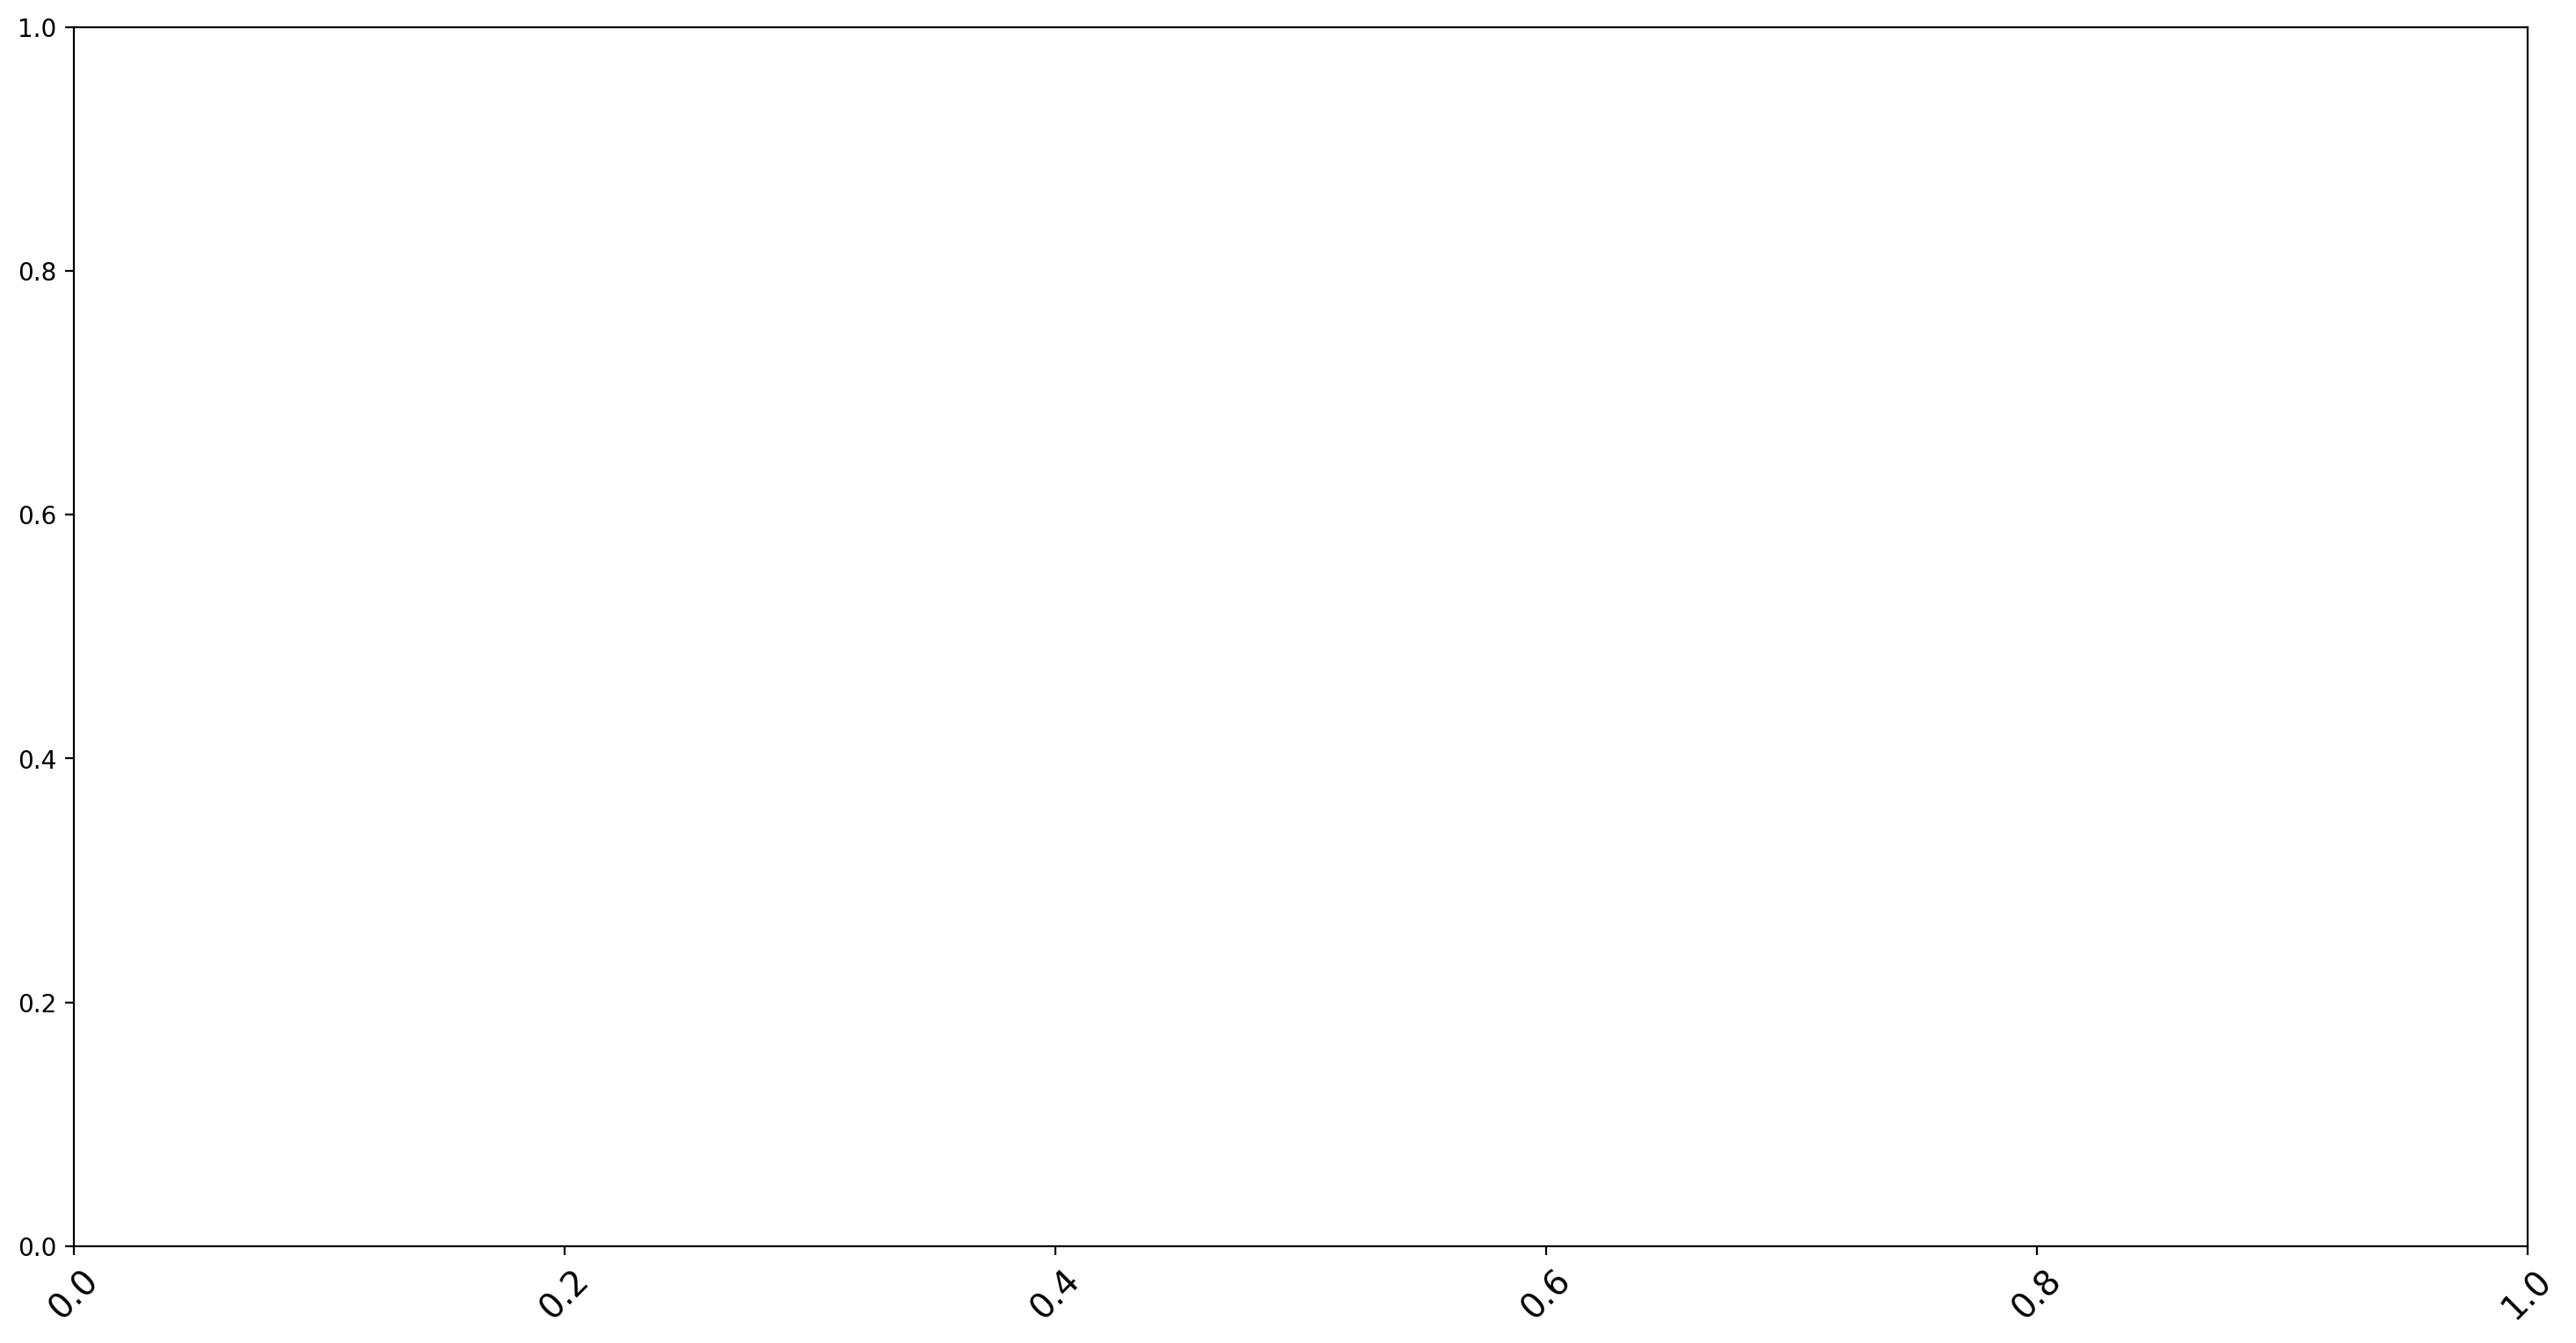

In [ ]:
plt.figure(figsize=(18,9),dpi=200)
# plt.xticks(ticks=rev_per_month['Month'],labels='Year Month'
plt.xticks(
    rotation = 45,
    fontsize = 14
    )


plt.contour(
    rev_per_month['Month'],
    rev_per_month['Total price']
)



TypeError: only length-1 arrays can be converted to Python scalars

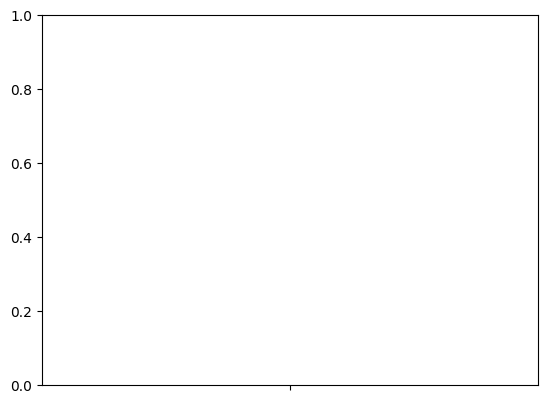

In [ ]:
df['Total price'] = pd.to_numeric(df['Total price'])
store_price = df.groupby('Month').agg({'Total price': pd.Series.sum})
store_price['Total price'] = round(store_price['Total price'])


plt.bar(store_price.index,
        store_price.values)